In [1]:
import pandas as pd

data = pd.read_csv("../data/2019_Yellow_Taxi_Trip_Data.csv")
data.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [2]:
# Group the data by vendorid.
data['vendorid_count'] = data.groupby('vendorid')['vendorid'].transform('count').astype(int)
# data.groupby('vendorid')[['trip_distance','fare_amount','tip_amount','trip_distance','vendorid_count']].mean()

grouped_data = data.groupby('vendorid').agg({
    'trip_distance': 'mean',
    'fare_amount': 'mean',
    'tip_amount': 'mean',
    'vendorid_count': 'first'  # Use 'first' to maintain the integer type for vendorid_count
}).reset_index()

grouped_data

,vendorid,trip_distance,fare_amount,tip_amount,vendorid_count
0,1,2.921567,14.959541,2.544240,3663
1,2,3.069402,15.191152,2.686664,6337


In [3]:
# Sum the total_amount for each vendor.
revenues_by_vendor = data.groupby('vendorid')[['total_amount','passenger_count']].sum().reset_index()
revenues_by_vendor

,vendorid,total_amount,passenger_count
0,1,82158.32,4481
1,2,143488.27,10496


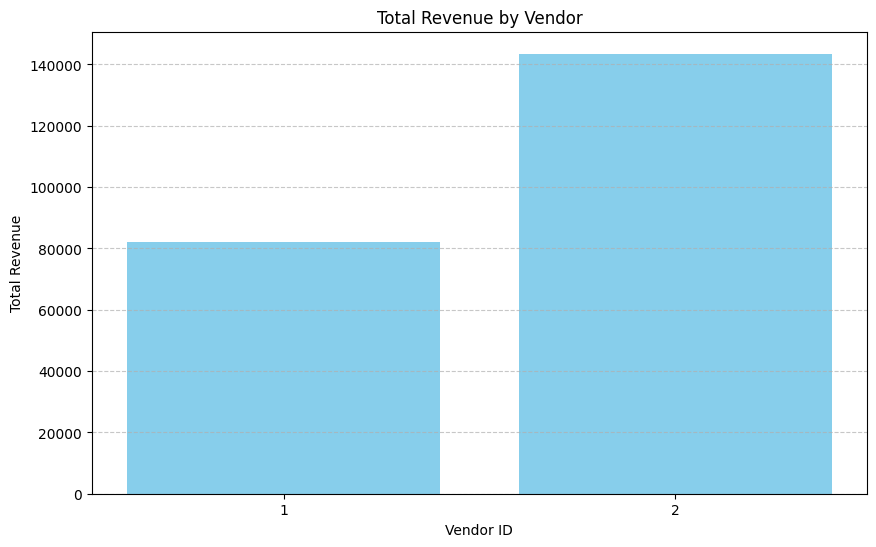

In [4]:
# Compare the total revenues and visualize the results using bar charts.
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(revenues_by_vendor['vendorid'], revenues_by_vendor['total_amount'], color='skyblue')
plt.xlabel('Vendor ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Vendor')
plt.xticks(revenues_by_vendor['vendorid'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
